# Week-1

# Linear Regression Example using tensorflow
Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.


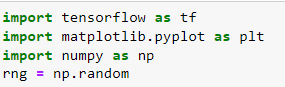

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng = np.random

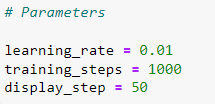

In [2]:
learning_rate = 0.01
training_steps =1000
display_step = 50

In [3]:
# Just run the next cell using 'Ctrl' + 'Enter'

In [4]:
# Training Data.

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])

Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = X.shape[0]

In [5]:
print(X, '\n', X.shape)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


In [6]:
print(X, '\n', Y.shape)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


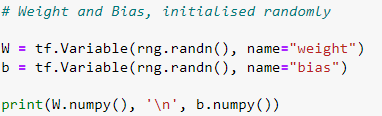

In [7]:
w = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
print(w.numpy(), '\n', b.numpy())

0.10891023 
 0.5390025


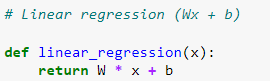

In [8]:
def linear_regression(x):
    return w * x + b

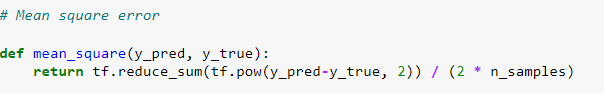

In [9]:
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

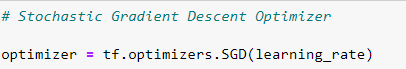

In [10]:
#Stochastic Gradient Descent Optimizer 
optimizer = tf.optimizers.SGD(learning_rate)

In [11]:
# Adding a question mark () after the function name lets you view the latest documentation. 
# This is a handy tool.

In [12]:
tf.optimizer.SGD?

Object `tf.optimizer.SGD` not found.


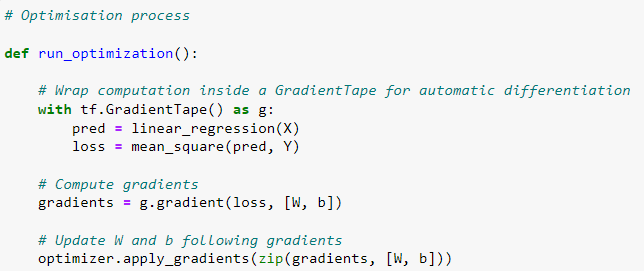

In [13]:
def run_optimization():
    
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred,Y)
        
    gradients = g.gradient(loss,[w,b])
    
    optimizer.apply_gradients(zip(gradients, [w,b]))

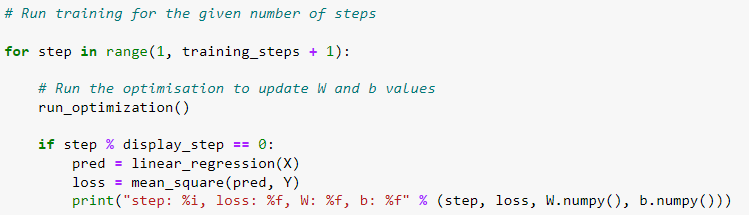

In [14]:
for step in range(1, training_steps +1):
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step,loss,w.numpy(), b.numpy()))

step: 50, loss: 0.079956, W: 0.282828, b: 0.577656
step: 100, loss: 0.079610, W: 0.280990, b: 0.590686
step: 150, loss: 0.079303, W: 0.279261, b: 0.602948
step: 200, loss: 0.079032, W: 0.277633, b: 0.614488
step: 250, loss: 0.078791, W: 0.276101, b: 0.625348
step: 300, loss: 0.078578, W: 0.274659, b: 0.635568
step: 350, loss: 0.078390, W: 0.273303, b: 0.645186
step: 400, loss: 0.078222, W: 0.272026, b: 0.654237
step: 450, loss: 0.078075, W: 0.270825, b: 0.662755
step: 500, loss: 0.077943, W: 0.269694, b: 0.670771
step: 550, loss: 0.077827, W: 0.268630, b: 0.678315
step: 600, loss: 0.077725, W: 0.267628, b: 0.685414
step: 650, loss: 0.077634, W: 0.266686, b: 0.692095
step: 700, loss: 0.077553, W: 0.265799, b: 0.698382
step: 750, loss: 0.077482, W: 0.264965, b: 0.704299
step: 800, loss: 0.077418, W: 0.264179, b: 0.709867
step: 850, loss: 0.077362, W: 0.263440, b: 0.715107
step: 900, loss: 0.077313, W: 0.262745, b: 0.720039
step: 950, loss: 0.077269, W: 0.262090, b: 0.724679
step: 1000, l

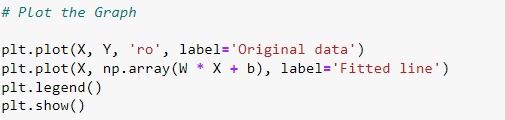

C:\Users\Owner\AppData\Local\Temp\ipykernel_9552\1863343447.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X, Y, 'ro', markersize=8, label='Original data', color='grey')


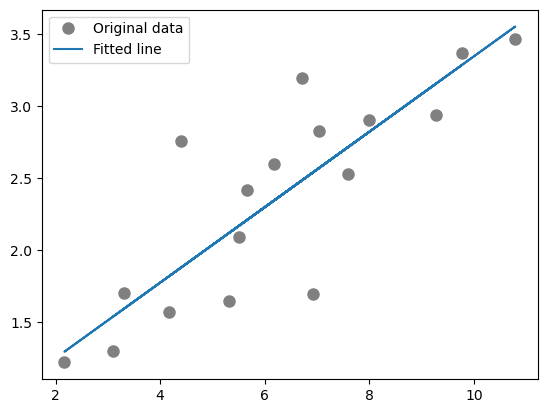

In [26]:
# plt.plot(X,Y, 'ro', label='Original data')
plt.plot(X, Y, 'ro', markersize=8, label='Original data', color='grey')
plt.plot(X, np.array(w * X + b ), label='Fitted line')
plt.legend()
plt.show()

# Lab Logbook requirements: 
### Please make sure to document the following in your Lablogbook:

Include an image of the generated graph depicting the original data and the fitted line for linear regression. Modify the appearance of the graph by adjusting its color or size. Copy the figure and paste it directly into your logbook. Refrain from taking a snapshot; instead, right-click and copy the graph to your lab logbook. Ensure that no code or other information is added to the logbook and that only required graph is present.  

#### Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.